In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from google.colab import drive

%matplotlib inline
drive.mount("/drive")

Mounted at /drive


In [3]:
df = pd.read_csv("/drive/MyDrive/Dataset.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [5]:
df_sales = df.groupby(by=["ProductCode", "Date"]).agg({"Sales": "sum"}).reset_index()
df_sales

,ProductCode,Date,Sales
0,15645,2004-01-01,21600
1,15645,2004-02-01,17050
2,15645,2004-03-01,23750
3,15645,2004-04-01,21225
4,15645,2004-05-01,22775
...,...,...,...
1081,99207,2006-08-01,51532
1082,99207,2006-09-01,77668
1083,99207,2006-10-01,64776
1084,99207,2006-11-01,54050


In [ ]:
def forecast_product_arima(prd_code, param):
  df_ts = df_sales[df_sales["ProductCode"] == prd_code].set_index("Date").asfreq("MS")
  model = sm.tsa.statespace.SARIMAX(df_ts["Sales"], order=param).fit()
  df_test = df_ts.copy()
  df_test = pd.concat([
      df_test,
      pd.DataFrame(
          {"Sales": [None]*12},
          index=pd.to_datetime(
              [f"2007-0{m}-01" if m < 10 else f"2007-{m}-01" for m in range(1, 13)],
              format="%Y-%m-%d"
          ))
      ])
  df_test["Forecast"] = model.predict(start=24, end=48, dynamic=True)
  df_test["Difference"] = df_test["Forecast"] - df_test["Sales"]
  mape = np.round(np.mean(np.abs(100 * (df_test["Forecast"] - df_test["Sales"]) / df_test["Sales"])), 0)
  df_test[["Sales", "Forecast"]].plot()
  df_test["Forecast"] = df_test["Forecast"].fillna(0).map(int)
  print("MAPE: ", f"{mape}%")
  return df_test[["Sales", "Forecast", "Difference"]]


In [7]:
def forecast_product_sarimax(prd_code, param):
  df_ts = df_sales[df_sales["ProductCode"] == prd_code].set_index("Date").asfreq("MS")
  model = sm.tsa.statespace.SARIMAX(df_ts["Sales"], order=param[:3], seasonal_order=param[3:]).fit()
  df_test = df_ts.copy()
  df_test = pd.concat([
      df_test,
      pd.DataFrame(
          {"Sales": [None]*12},
          index=pd.to_datetime(
              [f"2007-0{m}-01" if m < 10 else f"2007-{m}-01" for m in range(1, 13)],
              format="%Y-%m-%d"
          ))
      ])
  df_test["Forecast"] = model.predict(start=24, end=48, dynamic=True)
  df_test["Difference"] = df_test["Forecast"] - df_test["Sales"]
  mape = np.round(np.mean(np.abs(100 * (df_test["Forecast"] - df_test["Sales"]) / df_test["Sales"])), 0)
  df_test[["Sales", "Forecast"]].plot()
  df_test["Forecast"] = df_test["Forecast"].fillna(0).map(int)
  print("MAPE: ", f"{mape}%")
  return df_test[["Sales", "Forecast", "Difference"]]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  6.0%


,Sales,Forecast,Difference
2004-01-01,1735190,0,NaN
2004-02-01,1501550,0,NaN
2004-03-01,1177651,0,NaN
2004-04-01,1583360,0,NaN
2004-05-01,1898640,0,NaN
2004-06-01,1939550,0,NaN
2004-07-01,1868450,0,NaN
2004-08-01,1928350,0,NaN
2004-09-01,1623500,0,NaN
2004-10-01,1382650,0,NaN


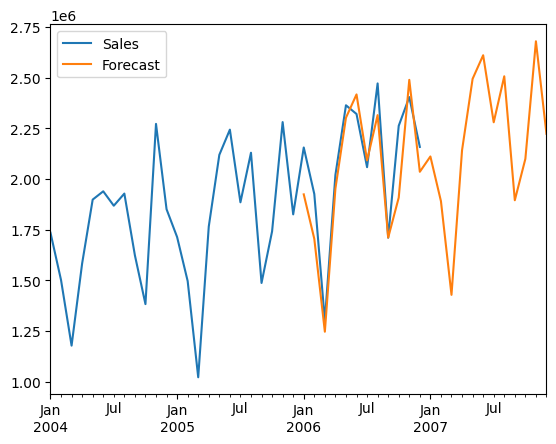

In [ ]:
forecast_product_sarimax(38060, (0, 1, 1, 1, 1, 2, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  11.0%


,Sales,Forecast,Difference
2004-01-01,126735,0,NaN
2004-02-01,118965,0,NaN
2004-03-01,128367,0,NaN
2004-04-01,353132,0,NaN
2004-05-01,326775,0,NaN
2004-06-01,378960,0,NaN
2004-07-01,165045,0,NaN
2004-08-01,123660,0,NaN
2004-09-01,168031,0,NaN
2004-10-01,172767,0,NaN


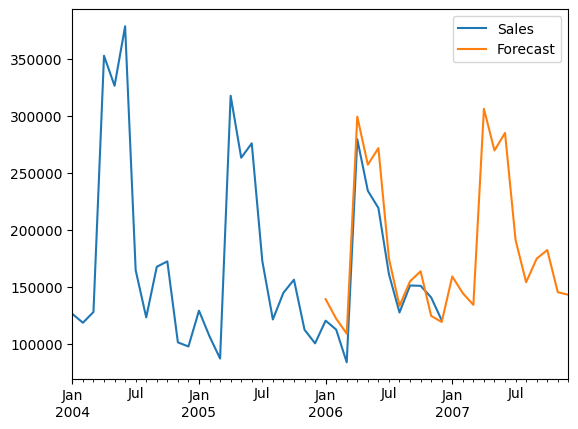

In [ ]:
forecast_product_sarimax(44564, (0, 1, 1, 1, 1, 1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  10.0%


,Sales,Forecast,Difference
2004-01-01,77974,0,NaN
2004-02-01,72710,0,NaN
2004-03-01,57645,0,NaN
2004-04-01,98415,0,NaN
2004-05-01,172616,0,NaN
2004-06-01,118300,0,NaN
2004-07-01,108045,0,NaN
2004-08-01,130622,0,NaN
2004-09-01,150398,0,NaN
2004-10-01,241220,0,NaN


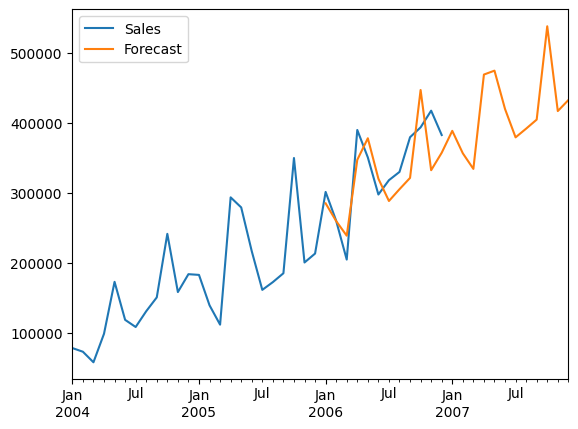

In [ ]:
forecast_product_sarimax(42588, (1, 1, 1, 1, 1, 2, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  19.0%


,Sales,Forecast,Difference
2004-01-01,14580,0,NaN
2004-02-01,16680,0,NaN
2004-03-01,17540,0,NaN
2004-04-01,40245,0,NaN
2004-05-01,33560,0,NaN
2004-06-01,22700,0,NaN
2004-07-01,23690,0,NaN
2004-08-01,33440,0,NaN
2004-09-01,59570,0,NaN
2004-10-01,71531,0,NaN


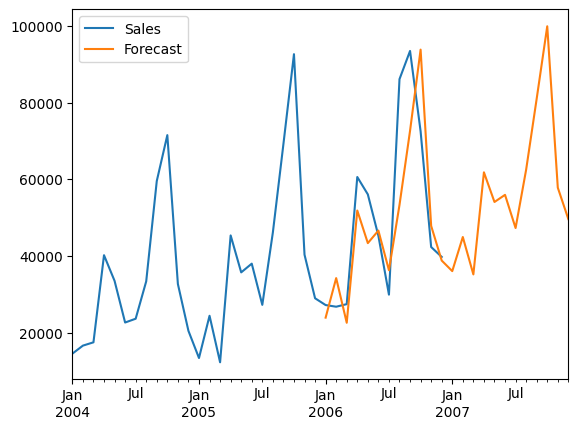

In [ ]:
forecast_product_sarimax(23755, (0, 1, 1, 1, 1, 2, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  12.0%


,Sales,Forecast,Difference
2004-01-01,5631370,0,NaN
2004-02-01,5338870,0,NaN
2004-03-01,3859123,0,NaN
2004-04-01,5660960,0,NaN
2004-05-01,6215450,0,NaN
2004-06-01,7914610,0,NaN
2004-07-01,9043270,0,NaN
2004-08-01,7630660,0,NaN
2004-09-01,7976880,0,NaN
2004-10-01,7970740,0,NaN


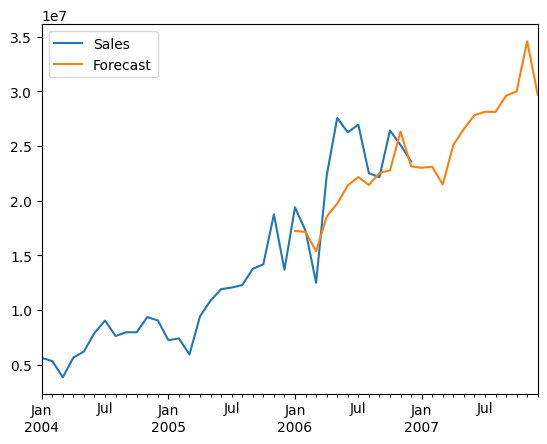

In [ ]:
forecast_product_sarimax(56658, (0, 1, 1, 1, 1, 2, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  18.0%


,Sales,Forecast,Difference
2004-01-01,32150,0,NaN
2004-02-01,25700,0,NaN
2004-03-01,42450,0,NaN
2004-04-01,43600,0,NaN
2004-05-01,47050,0,NaN
2004-06-01,49050,0,NaN
2004-07-01,30550,0,NaN
2004-08-01,37050,0,NaN
2004-09-01,36250,0,NaN
2004-10-01,54000,0,NaN


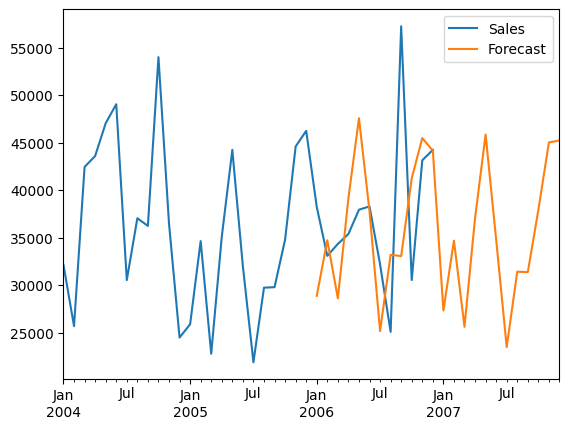

In [ ]:
forecast_product_sarimax(19920, (0, 0, 0, 1, 1, 1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE:  18.0%


,Sales,Forecast,Difference
2004-01-01,32150,0,NaN
2004-02-01,25700,0,NaN
2004-03-01,42450,0,NaN
2004-04-01,43600,0,NaN
2004-05-01,47050,0,NaN
2004-06-01,49050,0,NaN
2004-07-01,30550,0,NaN
2004-08-01,37050,0,NaN
2004-09-01,36250,0,NaN
2004-10-01,54000,0,NaN


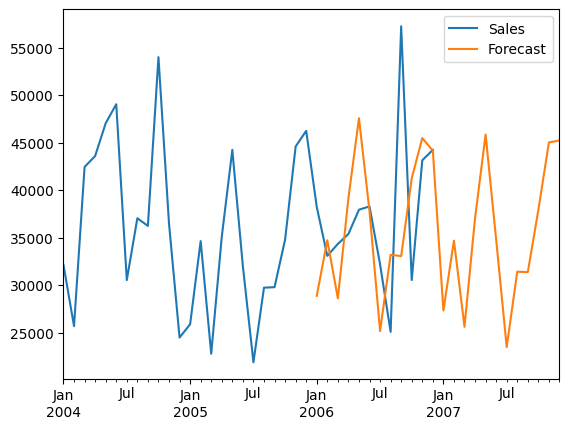

In [ ]:
forecast_product_sarimax(19920,(0,0,0,1,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE:  15.0%


,Sales,Forecast,Difference
2004-01-01,32150,0,NaN
2004-02-01,25700,0,NaN
2004-03-01,42450,0,NaN
2004-04-01,43600,0,NaN
2004-05-01,47050,0,NaN
2004-06-01,49050,0,NaN
2004-07-01,30550,0,NaN
2004-08-01,37050,0,NaN
2004-09-01,36250,0,NaN
2004-10-01,54000,0,NaN


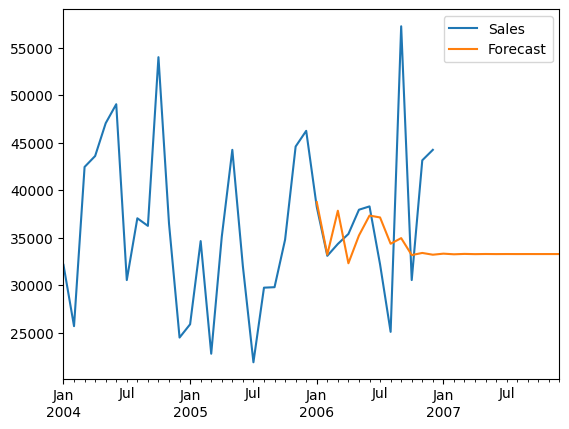

In [ ]:
forecast_product_arima(19920,(1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE:  22.0%


,Sales,Forecast,Difference
2004-01-01,267,0,NaN
2004-02-01,668,0,NaN
2004-03-01,260,0,NaN
2004-04-01,512,0,NaN
2004-05-01,323,0,NaN
2004-06-01,485,0,NaN
2004-07-01,756,0,NaN
2004-08-01,1703,0,NaN
2004-09-01,528,0,NaN
2004-10-01,1438,0,NaN


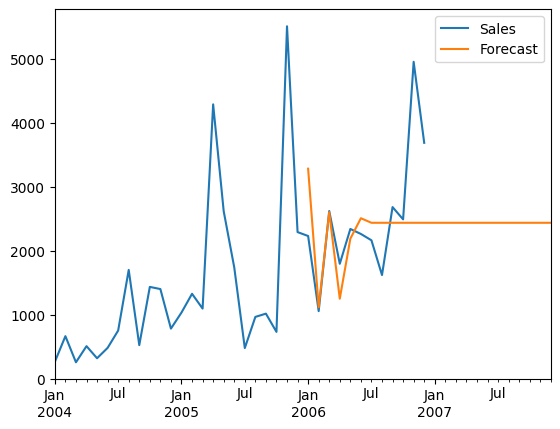

In [ ]:
forecast_product_arima(79565,(0,1,7))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAPE:  15.0%


,Sales,Forecast,Difference
2004-01-01,38153,0,NaN
2004-02-01,87870,0,NaN
2004-03-01,35050,0,NaN
2004-04-01,68207,0,NaN
2004-05-01,72684,0,NaN
2004-06-01,79110,0,NaN
2004-07-01,95176,0,NaN
2004-08-01,69370,0,NaN
2004-09-01,69610,0,NaN
2004-10-01,87384,0,NaN


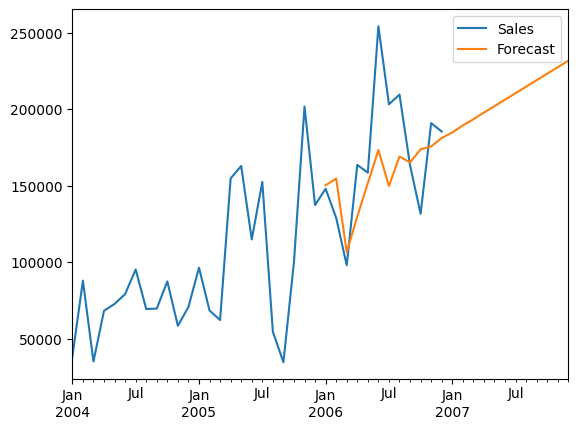

In [ ]:
forecast_product_arima(87890,(1,2,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAPE:  14.0%


,Sales,Forecast,Difference
2004-01-01,38153,0,NaN
2004-02-01,87870,0,NaN
2004-03-01,35050,0,NaN
2004-04-01,68207,0,NaN
2004-05-01,72684,0,NaN
2004-06-01,79110,0,NaN
2004-07-01,95176,0,NaN
2004-08-01,69370,0,NaN
2004-09-01,69610,0,NaN
2004-10-01,87384,0,NaN


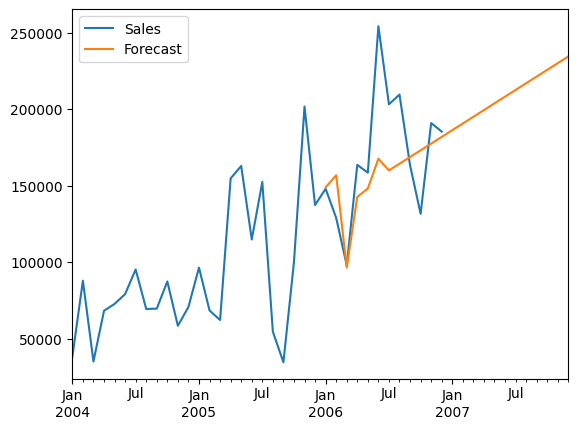

In [ ]:
forecast_product_arima(87890,(0,2,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAPE:  17.0%


,Sales,Forecast,Difference
2004-01-01,1093,0,NaN
2004-02-01,1529,0,NaN
2004-03-01,2022,0,NaN
2004-04-01,3791,0,NaN
2004-05-01,2292,0,NaN
2004-06-01,2976,0,NaN
2004-07-01,3296,0,NaN
2004-08-01,2006,0,NaN
2004-09-01,2358,0,NaN
2004-10-01,2137,0,NaN


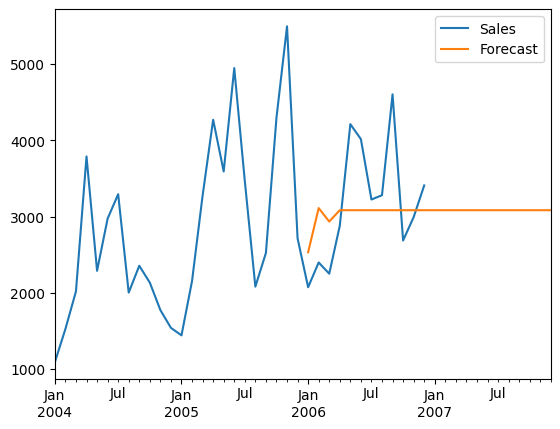

In [ ]:
forecast_product_arima(78665,(0,1,4))

MAPE:  17.0%


,Sales,Forecast,Difference
2004-01-01,1093,0,NaN
2004-02-01,1529,0,NaN
2004-03-01,2022,0,NaN
2004-04-01,3791,0,NaN
2004-05-01,2292,0,NaN
2004-06-01,2976,0,NaN
2004-07-01,3296,0,NaN
2004-08-01,2006,0,NaN
2004-09-01,2358,0,NaN
2004-10-01,2137,0,NaN


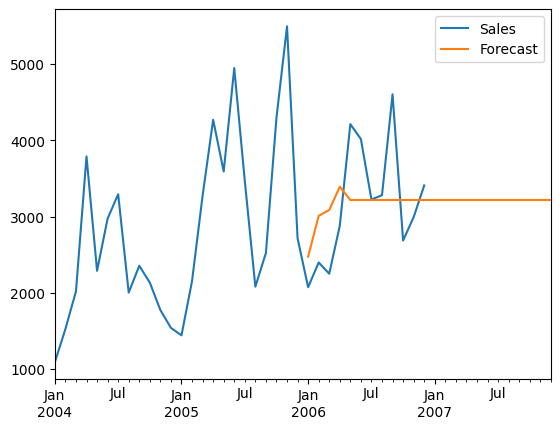

In [ ]:
forecast_product_arima(78665,(0,1,5))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE:  43.0%


,Sales,Forecast,Difference
2004-05-01,50,0,NaN
2004-06-01,376,0,NaN
2004-07-01,220,0,NaN
2004-08-01,6,0,NaN
2004-09-01,335,0,NaN
2004-10-01,80,0,NaN
2004-11-01,830,0,NaN
2004-12-01,623,0,NaN
2005-01-01,656,0,NaN
2005-02-01,938,0,NaN


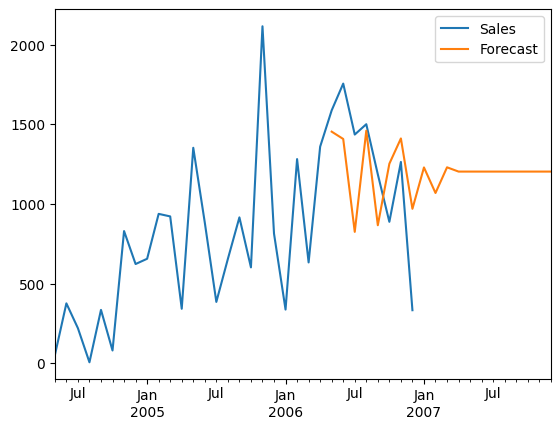

In [ ]:
forecast_product_arima(92930,(0,1,12))